In [436]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [407]:
ApplicationData = pd.read_csv("/Users/krishmehta/Documents/MSc AIML IITM/Credit EDA Case Study/application_data.csv")
PreviousApplication = pd.read_csv("/Users/krishmehta/Documents/MSc AIML IITM/Credit EDA Case Study/previous_application.csv")

In [408]:
#ApplicationData.head()
ApplicationData.value_counts('NAME_CONTRACT_TYPE')

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

In [409]:
#PreviousApplication.head()
#PreviousApplication.value_counts()
PreviousApplication.value_counts('NAME_CONTRACT_TYPE')
#PreviousApplication.value_counts('CODE_REJECT_REASON')

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
dtype: int64

In [410]:
PreviousApplication = PreviousApplication[(PreviousApplication['NAME_CONTRACT_TYPE']== 'Cash loans') |
                                          (PreviousApplication['NAME_CONTRACT_TYPE']== 'Revolving loans')
                                         ]

In [411]:
PreviousApplication = PreviousApplication[
                                          (PreviousApplication['NAME_CONTRACT_STATUS']== 'Refused')
                                         ]

In [413]:
PreviousApplication.value_counts('CODE_REJECT_REASON')

CODE_REJECT_REASON
HC        153219
LIMIT      26345
SCO        16535
SCOFR      12318
XNA         3406
VERIF       2951
SYSTEM       687
XAP            1
dtype: int64

In [447]:
PreviousApplication.dtypes
PreviousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,NaN,45000.0,SATURDAY,16,...,XNA,18.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
20,1506815,166490,Cash loans,25454.025,450000.0,491580.0,NaN,450000.0,MONDAY,6,...,XNA,24.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
23,1172937,302212,Cash loans,39475.305,1129500.0,1277104.5,NaN,1129500.0,THURSDAY,5,...,XNA,54.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

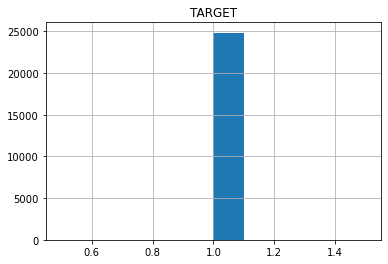

In [416]:
#Histogram of Payment Issues
#ApplicationDatah1 = ApplicationData

#ApplicationDatah1 = ApplicationDatah1[ApplicationDatah1['TARGET'] ==1 ]

ApplicationDatah1.hist(column='TARGET')

#As such, my hypothesis states that the best way to reduce default is to utilize credit score and low debt to income ratio.

array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

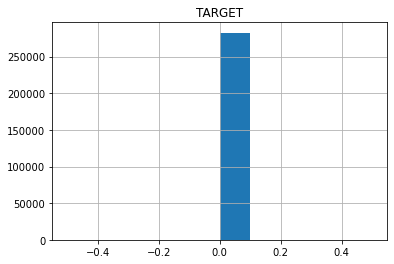

In [417]:
#Histogram of Payment Issues
ApplicationDatah0 = ApplicationData

ApplicationDatah0 = ApplicationDatah0[ApplicationDatah0['TARGET'] ==0 ]

ApplicationDatah0.hist(column='TARGET')

#As such, my hypothesis states that the best way to reduce default is to utilize credit score and low debt to income ratio.

In [418]:
# Variables I want to compare in the Target 0 vs. 1 group.
Target0 = ApplicationData[[
'NAME_CONTRACT_TYPE','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE'
                           ]].copy()

Target1 = ApplicationData[[
'NAME_CONTRACT_TYPE','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE'
                          ]].copy()

In [419]:
Target1 = Target1 [Target1['TARGET'] ==1 ]
Target1 = Target1 [Target1['AMT_INCOME_TOTAL'] < 500000]
Target1.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,24679.000000,24679.0,24679.000000,2.467900e+04,24679.000000,9981.000000,24627.000000,19023.000000
mean,277505.886016,1.0,157660.347441,5.556624e+05,26392.731756,0.386426,0.410334,0.391115
std,102369.301470,0.0,72695.251471,3.437743e+05,12343.360468,0.204555,0.213033,0.205833
min,100002.000000,1.0,25650.000000,4.500000e+04,2722.500000,0.014691,0.000005,0.000527
25%,189659.000000,1.0,112500.000000,2.844000e+05,17307.000000,0.221445,0.237905,0.223831
50%,276388.000000,1.0,135000.000000,4.952160e+05,25200.000000,0.360934,0.439109,0.380800
75%,366061.000000,1.0,193500.000000,7.297920e+05,32868.000000,0.536988,0.593549,0.553165
max,456254.000000,1.0,499500.000000,4.027680e+06,149211.000000,0.929394,0.811870,0.896010


In [421]:
Target0 = Target0 [Target0['TARGET'] ==0 ]
Target0 = Target0 [Target0['AMT_INCOME_TOTAL'] < 500000]
Target0.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,280130.000000,280130.0,280130.000000,2.801300e+05,280118.000000,122770.000000,2.795270e+05,225241.000000
mean,278241.645943,0.0,163830.352011,5.977845e+05,26936.667847,0.510578,5.226796e-01,0.521346
std,102825.331627,0.0,78780.519670,4.014822e+05,14247.619338,0.208818,1.863190e-01,0.190418
min,100003.000000,0.0,25650.000000,4.500000e+04,1615.500000,0.014568,8.173617e-08,0.000527
25%,189092.500000,0.0,112500.000000,2.700000e+05,16407.000000,0.344382,4.086302e-01,0.385915
50%,278364.500000,0.0,144000.000000,5.120640e+05,24750.000000,0.516178,5.729740e-01,0.547810
75%,367225.750000,0.0,202500.000000,8.086500e+05,34569.000000,0.681823,6.670377e-01,0.673830
max,456255.000000,0.0,499500.000000,4.050000e+06,225000.000000,0.962693,8.549997e-01,0.893976


In [422]:
Target1.insert(2, "Debt to Income",
((Target1['AMT_CREDIT']+Target1['AMT_ANNUITY'])/Target1['AMT_INCOME_TOTAL']),True) 

In [423]:
Target1.head()

,NAME_CONTRACT_TYPE,SK_ID_CURR,Debt to Income,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE
0,Cash loans,100002,2.129867,1,Cash loans,202500.0,406597.5,24700.5,0.083037,0.262949,0.139376,Working
26,Cash loans,100031,8.951720,1,Cash loans,112500.0,979992.0,27076.5,NaN,0.548477,0.190706,Working
40,Cash loans,100047,6.067200,1,Cash loans,202500.0,1193580.0,35028.0,NaN,0.306841,0.320163,Commercial associate
42,Cash loans,100049,2.260233,1,Cash loans,135000.0,288873.0,16258.5,0.468208,0.674203,0.399676,Working
81,Cash loans,100096,3.291278,1,Cash loans,81000.0,252000.0,14593.5,NaN,0.023952,0.720944,Pensioner


In [424]:
Target2 = Target1[[
'NAME_CONTRACT_TYPE','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','Debt to Income','NAME_INCOME_TYPE'
                          ]].copy()

Target2 = Target2 [Target2['Debt to Income'] < 20]

In [369]:
Target2.plot(
    kind='scatter',
    x='Debt to Income', 
    y=['EXT_SOURCE_3'], 
    backend='plotly', 
    width=500
)

In [425]:
LowCreditTable = Target1[[
'NAME_CONTRACT_TYPE','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',"Debt to Income",'NAME_INCOME_TYPE'
                          ]].copy()

In [426]:
LowCreditTable = LowCreditTable [LowCreditTable['EXT_SOURCE_3'] < .6]
LowCreditTable.head()
LowCreditTable.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,Debt to Income
count,15377.000000,15377.0,15377.000000,1.537700e+04,15377.000000,6577.000000,15356.000000,15377.000000,15377.000000
mean,277568.233596,1.0,163581.639819,5.568976e+05,26252.730474,0.380224,0.411600,0.319158,3.931422
std,102517.900386,0.0,74238.668920,3.373601e+05,11896.557606,0.201723,0.213348,0.156246,2.450010
min,100002.000000,1.0,27000.000000,4.500000e+04,2844.000000,0.014691,0.000005,0.000527,0.211056
25%,189698.000000,1.0,112500.000000,2.880000e+05,17424.000000,0.217476,0.239119,0.191822,2.221500
50%,276469.000000,1.0,153000.000000,4.975200e+05,25258.500000,0.357940,0.441852,0.320163,3.332000
75%,366231.000000,1.0,202500.000000,7.295670e+05,32602.500000,0.527259,0.594060,0.448962,5.026343
max,456233.000000,1.0,495000.000000,2.695500e+06,104094.000000,0.906428,0.811870,0.598926,25.581875


In [427]:
LowCreditTable.pivot_table('AMT_INCOME_TOTAL', ['NAME_INCOME_TYPE','TARGET'])

,,AMT_INCOME_TOTAL
NAME_INCOME_TYPE,TARGET,
Commercial associate,1,185503.164119
Pensioner,1,141987.825406
State servant,1,160840.405569
Working,1,159918.397216


In [428]:
DebtToIncomeOverride = LowCreditTable[[
'NAME_CONTRACT_TYPE','SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',"Debt to Income",'NAME_INCOME_TYPE'
                          ]].copy()

DebtToIncomeOverride = DebtToIncomeOverride [DebtToIncomeOverride['Debt to Income'] > .06]
DebtToIncomeOverride.head()
#DebtToIncomeOverride.describe()

,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,Debt to Income,NAME_INCOME_TYPE
0,Cash loans,Cash loans,Cash loans,Cash loans,100002,1,Cash loans,Cash loans,Cash loans,Cash loans,202500.0,406597.5,24700.5,0.083037,0.262949,0.139376,2.129867,Working
26,Cash loans,Cash loans,Cash loans,Cash loans,100031,1,Cash loans,Cash loans,Cash loans,Cash loans,112500.0,979992.0,27076.5,NaN,0.548477,0.190706,8.951720,Working
40,Cash loans,Cash loans,Cash loans,Cash loans,100047,1,Cash loans,Cash loans,Cash loans,Cash loans,202500.0,1193580.0,35028.0,NaN,0.306841,0.320163,6.067200,Commercial associate
42,Cash loans,Cash loans,Cash loans,Cash loans,100049,1,Cash loans,Cash loans,Cash loans,Cash loans,135000.0,288873.0,16258.5,0.468208,0.674203,0.399676,2.260233,Working
94,Cash loans,Cash loans,Cash loans,Cash loans,100112,1,Cash loans,Cash loans,Cash loans,Cash loans,315000.0,953460.0,64107.0,NaN,0.432340,0.077499,3.230371,Commercial associate


<AxesSubplot:ylabel='AMT_CREDIT'>

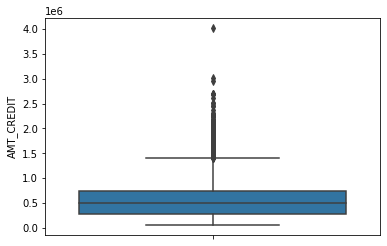

In [429]:
sns.boxplot(
    y=Target1["AMT_CREDIT"]
           )

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

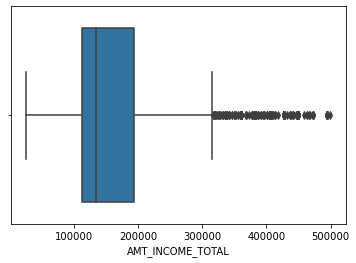

In [430]:
sns.boxplot(
    x=Target1["AMT_INCOME_TOTAL"],
           )

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

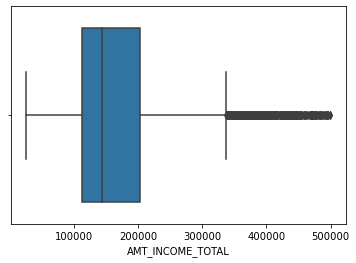

In [431]:
sns.boxplot(
    x=Target0["AMT_INCOME_TOTAL"],
#    y=Target0["AMT_CREDIT"]
           )

<AxesSubplot:ylabel='AMT_CREDIT'>

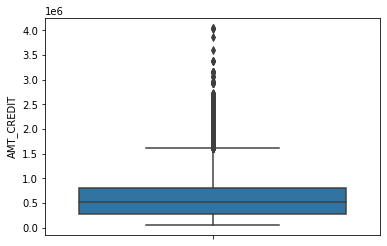

In [432]:
sns.boxplot(
#    x=Target0["AMT_INCOME_TOTAL"],
    y=Target0["AMT_CREDIT"]
           )

<AxesSubplot:>

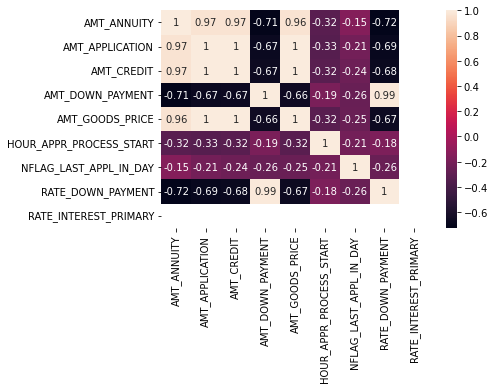

In [450]:
PreviousApplication2 = PreviousApplication [[
'NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT',
'RATE_INTEREST_PRIMARY'    
]].copy()

PreviousApplication2 = PreviousApplication2.corr()

Var_CorrPrevious = PreviousApplication2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_CorrPrevious, xticklabels=Var_CorrPrevious.columns, yticklabels=Var_CorrPrevious.columns, annot=True)


<AxesSubplot:>

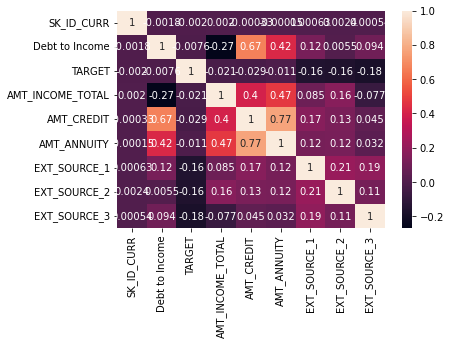

In [310]:
Var_Corr = Target1.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)